In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
#LabelEncoder is used to convert categorical data to numerical data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [69]:
data = pd.read_csv("test.csv")
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


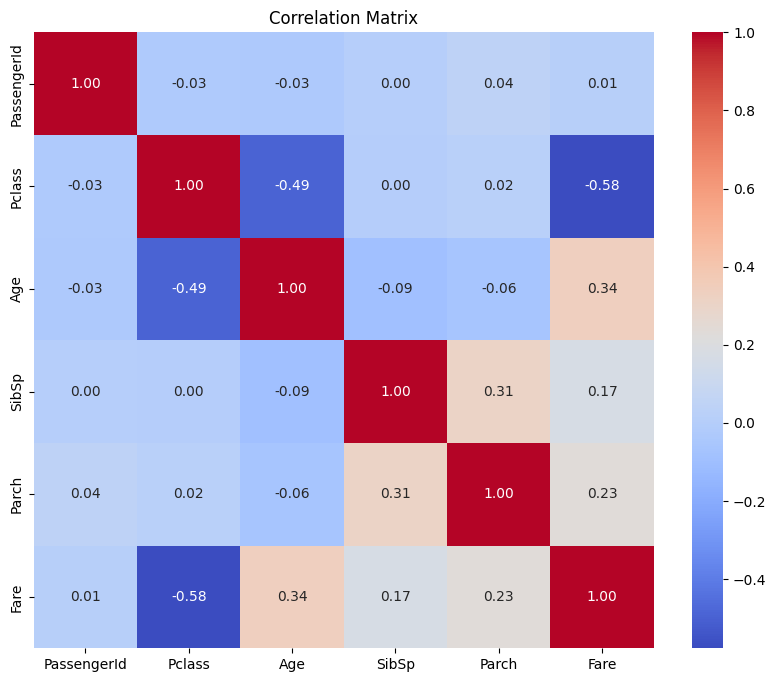

In [70]:
# First off, we need to find features that are truly important
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
if 'Survived' in correlation_matrix.columns:
	print(correlation_matrix["Survived"].sort_values(ascending=False))
else:
	# If 'Survived' is not in test set, use your training data for correlation
	train_numeric_data = pd.read_csv("train.csv").select_dtypes(include=[np.number])
	train_corr_matrix = train_numeric_data.corr()
	print(train_corr_matrix["Survived"].sort_values(ascending=False))
# Age, Pclass, SibSp, Parch, Fare are important features. You may wonder why Age is not that important. It is because there are many missing values in Age column.
# Let's visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#You see that Pclass and Age or SibSp and Parch are negatively correlated. This means that if Pclass is high, Age is low and vice versa. Same for SibSp and Parch.
# This means that we can drop one of the two columns. Let's drop Parch and SibSp.
# Still, you may wonder which feature is truly important. So, the higher the correlated value, the more important the feature is.
# But, isn't Age negatively correlated with Survived? Yes, it is. But, it is not that important. So, we can drop Age too.
# So, in conclusion, only Fare and Parch remains as positively correlated features. Let's keep them both.

In [72]:
# Use train.csv for training, since test.csv does not have 'Survived'
train_data = pd.read_csv("train.csv")
X = train_data[["Fare", "Parch", "Age", "Pclass", "SibSp", "Sex", "Embarked"]]
Y = train_data["Survived"]

# Let's label encode our data
le = LabelEncoder()
X["Age"] = le.fit_transform(X["Age"].astype(str))
X["Sex"] = le.fit_transform(X["Sex"])
X["Embarked"] = le.fit_transform(X["Embarked"].astype(str))

# How to identify if our data has missing values?
print(X["Age"].isnull().sum()) # missing values
print(X["Pclass"].isnull().sum()) # missing values
print(X["SibSp"].isnull().sum()) # missing values
print(X["Sex"].isnull().sum()) # missing values
print(X["Embarked"].isnull().sum()) # missing values

# Fill in the missing values with mean of the column
X["Age"].fillna(X["Age"].mean(), inplace=True)

# Now, let's split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

0
0
0
0
0


C:\Users\vpthi\AppData\Local\Temp\ipykernel_18388\2387157512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"] = le.fit_transform(X["Age"].astype(str))
C:\Users\vpthi\AppData\Local\Temp\ipykernel_18388\2387157512.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = le.fit_transform(X["Sex"])
C:\Users\vpthi\AppData\Local\Temp\ipykernel_18388\2387157512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [73]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

#68% accuracy. Not bad for a simple model. We can improve it further by using more advanced techniques like feature engineering, hyperparameter tuning, etc.
# So, how to fine-tune the model?
# Maybe adding more features would help. Let's add Age back and see if it improves the accuracy. And, tada, we got ourselves 71% accuracy.
# Let's try adding more features like Sex and Embarked
# Sex is a categorical feature. We need to convert it to numerical feature using LabelEncoder
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"].astype(str))

# 80% accuracy. Nice!
# Let's try Ridge and Lasso regression

Accuracy: 80.45%
Confusion Matrix:
[[89 16]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [74]:
model = Lasso(alpha=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Wait, this is logistic regression. We can't use MSE and R2 score here. But, isn't Lasso regression used for regression problems?
# Yes, it is. But in this case, we are using it for classification. So, we need to use classification metrics.
# Then how can we regularize a classification model?
# We can use techniques like L1 and L2 regularization.
# We can use accuracy score, confusion matrix and classification report
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred.round()))
print("Classification Report:")
print(classification_report(y_test, y_pred.round()))


Accuracy: 78.21%
Confusion Matrix:
[[88 17]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [75]:
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred.round()))
print("Classification Report:")
print(classification_report(y_test, y_pred.round()))

Accuracy: 78.77%
Confusion Matrix:
[[89 16]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [77]:
# Now, let's extract this into a csv file and upload it to Kaggle
# But first, we need to use the actual Kaggle test set, not the split test set

# Preprocess the Kaggle test set
test_data = data.copy()  # 'data' is already loaded as the Kaggle test set

# Fill missing values
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace=True)

# If 'Sex' and 'Embarked' are already encoded, skip encoding
# Otherwise, encode them as in training
if test_data["Sex"].dtype != np.int64:
    test_data["Sex"] = le.transform(test_data["Sex"])
if test_data["Embarked"].dtype != np.int64:
    test_data["Embarked"] = le.transform(test_data["Embarked"].astype(str))

# Select features as in training
X_test_kaggle = test_data[["Fare", "Parch", "Age", "Pclass", "SibSp", "Sex", "Embarked"]]

# Scale features using the scaler fitted on training data
X_test_kaggle_scaled = scaler.transform(X_test_kaggle)

# Predict using the trained model
y_pred_kaggle = model.predict(X_test_kaggle_scaled)

# Prepare submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_pred_kaggle.round().astype(int)
})
submission.to_csv("titanic_predictions.csv", index=False)
print("Submission file created: titanic_predictions.csv")


Submission file created: titanic_predictions.csv


C:\Users\vpthi\AppData\Local\Temp\ipykernel_18388\2032078858.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
C:\Users\vpthi\AppData\Local\Temp\ipykernel_18388\2032078858.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 